## Instacart Analysis - Orders and Revenue by Day of the Week & Hour of the Day
1.	Import libraries, set directory paths & import data
2.	Check data frame dimensions, columns and datatypes
3.	Busiest days of the week for placing orders.
    -	Check counts for order_day_of_week
    -	Create bar chart from value counts
    -	Export to file
4.	Busiest hours of the day for placing orders
    -	Display values counts
    -	Create bar chart
    -	Export bar chart
5.	Bar chart observations
6.	Average spend per day
    -	Calculate average spend per day
    -	Create subset for line graph plotting
    -	Save to file
7.	Average spend per hour
    -	Calculate average spend per hour
    -	Create subset for line graph plotting
    -	Export to file
8.	Average spending observations
9.	Total revenue per day
    -	Calculate total revenue generate each day
    -	Line graph subset
    -	Export graph to file
10.	Total revenue per hour
    -	Calculate total revenue generate each hour
    -	Line graph subset
    -	Export graph to file
11.	Total revenue observations


### import usual libraries plus visualisation tools

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### set data set directory path

In [2]:
datasetpath = r'D:\My Documents\! Omnicompetent Ltd\Courses\Career Foundry - Data Analytics\Data Analytics Course\Instacart Basket Analysis\02 Data Sets'
datasetpath

'D:\\My Documents\\! Omnicompetent Ltd\\Courses\\Career Foundry - Data Analytics\\Data Analytics Course\\Instacart Basket Analysis\\02 Data Sets'

### set visualisation directory path

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Courses\Career Foundry - Data Analytics\Data Analytics Course\Instacart Basket Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Courses\\Career Foundry - Data Analytics\\Data Analytics Course\\Instacart Basket Analysis\\04 Analysis'

### import revised data set (orders>5)

In [4]:
df_testing = pd.read_pickle(os.path.join(datasetpath,'testing_sample_keep.pkl'))
df_testing.head()

,order_id,user_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,department_id,price,gender,state,age,n_dependants,marital_status,income,region,max_order
0,2539329,1,1,2,8,0.0,196,0,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10
1,473747,1,3,3,12,21.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10
2,2254736,1,4,4,7,29.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10
3,550135,1,7,1,9,20.0,196,1,Soda,7,9.0,Female,Alabama,31,3,married,40423,South,10
4,2539329,1,1,2,8,0.0,14084,0,Organic Unsweetened Vanilla Almond Milk,16,12.5,Female,Alabama,31,3,married,40423,South,10


### review dimensions, columns & datatypes

In [5]:
df_testing.shape

(9268148, 19)

In [6]:
df_testing.dtypes

order_id                    int64
user_id                     int64
number_of_orders            int64
order_day_of_week           int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
reordered                   int64
product_name               object
department_id               int64
price                     float64
gender                     object
state                      object
age                         int64
n_dependants                int64
marital_status             object
income                      int64
region                     object
max_order                   int64
dtype: object

## Busiest days of the week for placing orders

### check value_counts() for 'order_day_of_week'
    where 0=Sat, 1=Sun, =Mon, 3=Tue, 4=Wed, 5=Thu, 6=Fri

In [6]:
df_testing['order_day_of_week'].value_counts(dropna=False).sort_index()

0    1769695
1    1618926
2    1204274
3    1098292
4    1084895
5    1207340
6    1284726
Name: order_day_of_week, dtype: int64

### display as bar chart

Text(0, 0.5, 'Number of Orders in Millions')

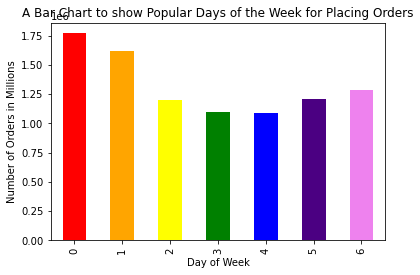

In [25]:
bar_busyday = df_testing['order_day_of_week'].value_counts().sort_index().plot.bar(color=['red','orange','yellow','green','blue','indigo','violet'])

plt.title('A Bar Chart to show Popular Days of the Week for Placing Orders')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders in Millions')

#### The weekend is the most popular time for placing orders (day 0=Sat, day1=Sun).  
#### The quietest times are day 3=Tue and day 4=Wed .

### export visualisation to png

In [15]:
bar_busyday.figure.savefig(os.path.join(vizpath,'01 Bar Chart to show Popular Days of the Week for Placing Orders.png'))

## Busiest hours in the day for orders

### show value_counts for hours of order

In [9]:
df_testing['order_hour_of_day'].value_counts().sort_index()

0      62299
1      32856
2      19626
3      14396
4      15178
5      25230
6      84486
7     257931
8     495329
9     707510
10    793681
11    781696
12    747496
13    760664
14    768534
15    760212
16    723418
17    593527
18    464027
19    357021
20    277853
21    228676
22    181210
23    115292
Name: order_hour_of_day, dtype: int64

### display as bar chart

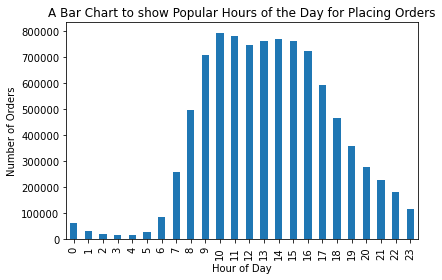

In [32]:
bar_busyhour = df_testing['order_hour_of_day'].value_counts().sort_index().plot.bar()

plt.title('A Bar Chart to show Popular Hours of the Day for Placing Orders')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.tight_layout()

#### The majority of orders are placed between 9am and 5pm.  This follows the traditional pattern of shopping via a physical store.
#### One immediate suggestion is to generate sales is to provide offers during the early morning hours to encourage 'Early Bird' shopping.

### export to png

In [33]:
bar_busyhour.figure.savefig(os.path.join(vizpath,'02 Bar Chart to show Popular Hours of the Day for Placing Orders.png'))

## Average spend per day

### calculate avg spend per day

In [34]:
df_testing['avg_spend_per_day'] = df_testing.groupby(['order_day_of_week']) ['price'].transform(np.mean)

In [35]:
df_testing['avg_spend_per_day'].describe()

count    9.268148e+06
mean     7.789125e+00
std      4.568872e-02
min      7.750537e+00
25%      7.755743e+00
50%      7.760318e+00
75%      7.853101e+00
max      7.855571e+00
Name: avg_spend_per_day, dtype: float64

### create sub set for line graph data

In [37]:
df_lineavgday = df_testing[['order_day_of_week','avg_spend_per_day']]

Text(0, 0.5, 'Average Spend in $')

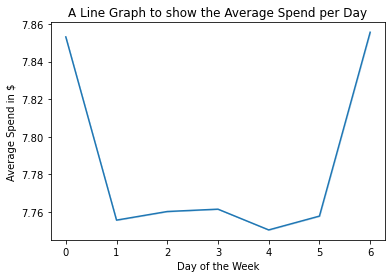

In [38]:
line_avgday = sns.lineplot(data=df_lineavgday, x='order_day_of_week', y='avg_spend_per_day')

plt.title('A Line Graph to show the Average Spend per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Spend in $')

### export viz

In [39]:
line_avgday.figure.savefig(os.path.join(vizpath,'03 Line Graph to Show Average Spending each Day.png'))

## Average spending per hour

### calculate average spend per hour

In [40]:
df_testing['avg_spend_per_hour'] = df_testing.groupby(['order_hour_of_day']) ['price'].transform(np.mean)

In [41]:
df_testing['avg_spend_per_hour'].describe()

count    9.268148e+06
mean     7.789125e+00
std      2.303021e-02
min      7.746199e+00
25%      7.787913e+00
50%      7.796109e+00
75%      7.803490e+00
max      7.858087e+00
Name: avg_spend_per_hour, dtype: float64

### create line subset for linegraph data

In [42]:
df_lineavghour = df_testing[['order_hour_of_day','avg_spend_per_hour']]

In [43]:
df_lineavghour.head()

,order_hour_of_day,avg_spend_per_hour
0,8,7.798752
1,12,7.796109
2,7,7.824858
3,9,7.750549
4,8,7.798752


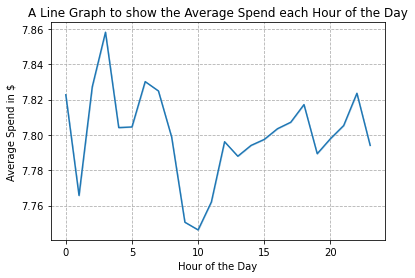

In [44]:
line_avghour = sns.lineplot(data=df_lineavghour, x='order_hour_of_day', y='avg_spend_per_hour')

plt.title('A Line Graph to show the Average Spend each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spend in $')
plt.grid(True, linestyle='--')

### exportviz

In [45]:
line_avghour.figure.savefig(os.path.join(vizpath,'04 Line Graph to Show Average Spend each Hour of the Day.png'))

#### The average spending by the day and hour does not have a massive range (<0.5USD between higher and lower limits), infact, this could have been concluded without the need for a graph and by looking at the descriptive statistice for average spending.

## Total revenue per day

### calculate total revenue generate each day

In [27]:
df_testing['total_spend_per_day'] = df_testing.groupby(['order_day_of_week']) ['price'].transform(np.sum)

### linegraph subset

In [28]:
df_linetotalday = df_testing[['order_day_of_week','total_spend_per_day']]

In [29]:
df_linetotalday.head()

,order_day_of_week,total_spend_per_day
0,2,9.343826e+06
1,3,8.522967e+06
2,4,8.407240e+06
3,1,1.255403e+07
4,2,9.343826e+06


Text(0, 0.5, 'Total Revenue in $')

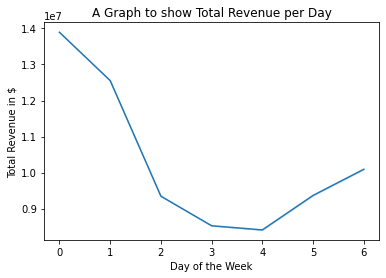

In [30]:
line_totalday = sns.lineplot(data=df_linetotalday, x='order_day_of_week', y='total_spend_per_day')

plt.title('A Graph to show Total Revenue per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue in $')

### export viz

In [31]:
line_totalday.figure.savefig(os.path.join(vizpath,'Line Graph to Show Total Revenue per Day.png'))

## Total revenue per hour

### calculate total revenue generate each hour

In [32]:
df_testing['total_spend_per_hour'] = df_testing.groupby(['order_hour_of_day']) ['price'].transform(np.sum)

### linegraph subset

In [33]:
df_linetotalhour = df_testing[['order_hour_of_day','total_spend_per_hour']]

In [34]:
df_linetotalhour.head()

,order_hour_of_day,total_spend_per_hour
0,8,3.862347e+06
1,12,5.826672e+06
2,7,2.017992e+06
3,9,5.482863e+06
4,8,3.862347e+06


Text(0, 0.5, 'Total Revenue Spend in $')

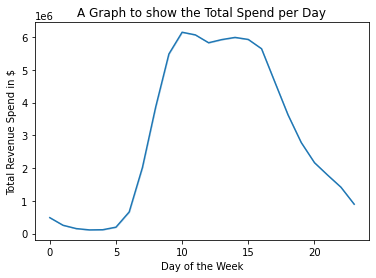

In [35]:
line_totalhour = sns.lineplot(data=df_linetotalhour, x='order_hour_of_day', y='total_spend_per_hour')

plt.title('A Graph to show the Total Spend per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue Spend in $')

### export viz

In [36]:
line_totalhour.figure.savefig(os.path.join(vizpath,'Line Graph to Show Total Revenue each Hour of the Day.png'))

#### The total revenue geneate on a per day or per hour basis, follows the same pattern as the freqenecy of orders placed, and does not highlight anything unusual.